# NISQ Experiment

In [7]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import random_unitary, Operator

In [9]:
#qk.IBMQ.save_account("a9ec3c697bede976217e9ff6c5c0f19a2511ea34a225bbe10f0c74bda39de845d16fa3f7c30b47c5714e2b695aded3cfd474e7c1b33056014fab89301b83d724", overwrite=True) 
provider = qk.IBMQ.load_account()
provider = qk.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend("ibmq_belem")

#backend = AerSimulator()

In [10]:
def execute_and_collect(circuit_list, backend, file_name=None, shots=20000):
    N = len(circuit_list)
    num_batches = (N+500-1)//500
    circuit_batch_list = [circuit_list[500*i: 500*(i+1)] for i in range(num_batches)]
    counts_list = []
    for i, circuit_batch in enumerate(tqdm(circuit_batch_list)):
        num_parcels = (len(circuit_batch) + 100 - 1)//100
        circuit_parcel_list = [circuit_batch[100*j: 100*(j+1)] for j in range(num_parcels)]
        job_list = []
        
        for circuit_parcel in circuit_parcel_list:
            trans_circ_list = qk.transpile(circuit_parcel, 
                                           backend, 
                                           optimization_level = 0, 
                                           seed_transpiler=42, 
                                           scheduling_method = 'asap') 
            job = backend.run(trans_circ_list, shots = shots)
            job_list.append(job)
        
        result_list = []
        for job in tqdm(job_list):
            result_list.append(job.result())
            
        for result, circuit_parcel in zip(result_list, circuit_parcel_list):
            counts_list.extend([result.get_counts(circuit) for circuit in circuit_parcel]) 
        
    return counts_list  

## Ring Disk Transition

In [5]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i > 2:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/threeQubits_PQC_noDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(5, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    
    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_5usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(10, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    
    if i>2:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/threeQubits_PQC_10usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(15, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    
    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_15usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(20, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>2:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/threeQubits_PQC_20usDelay_belem_{i}_retry.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(5):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(25, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam
    if i>2:
        counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
        data = [inputs_map, inputs_spam, counts_list]
        pickle.dump(data, open(f"../../data/threeQubits_PQC_25usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(3):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(30, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam

    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_30usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(3):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(35, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam

    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_35usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

for i in range(3):
    circuit_target = pqc_basic(n, 8).reverse_bits()
    circuit_target.delay(40, unit="us")

    N = 2000 - 6**n
    inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
    inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

    circuit_list = circuit_list_map + circuit_list_spam

    counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
    data = [inputs_map, inputs_spam, counts_list]
    pickle.dump(data, open(f"../../data/threeQubits_PQC_40usDelay_belem_{i}.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

## Entangling Dissipation

In [11]:
backend = provider.get_backend("ibmq_belem")

n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

circuit_target = qk.QuantumCircuit(n)
circuit_target.delay(10, unit="us")

N = 2000 - 6**n
inputs_map, circuit_list_map = generate_pauli_circuits(n, circuit_target, N)
inputs_spam, circuit_list_spam = generate_pauliInput_circuits(n)

circuit_list = circuit_list_map + circuit_list_spam

counts_list = execute_and_collect(circuit_list, backend, shots = 1000)
data = [inputs_map, inputs_spam, counts_list]
pickle.dump(data, open(f"../../data/threeQubits_decay_belem.p", "wb"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
def regularized_fit(d, data, num_iter_spam=1000, num_iter_map=2000, N=500, weight=1, start = 1):
    
    inputs_spam, targets_spam, inputs_map, targets_map = data
    
    spam = SPAM(d=d, 
                use_corr_mat = True,
                optimizer = tf.optimizers.Adam(learning_rate=0.01),
                )
    
    spam.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                  num_iter = 300,
                  verbose = False,
                  )
    
    spam.train(inputs = inputs_spam,
               targets = targets_spam,
               num_iter = num_iter_spam,
               verbose = False,
              )
    model_fullrank = ModelQuantumMap(channel = KrausMap(d=d, 
                                               rank=d**2,
                                               spam = spam,
                                               ),
                                     loss_function = ProbabilityMSE(),
                                     optimizer = tf.optimizers.Adam(learning_rate=0.01),
                                     logger = Logger(loss_function = ProbabilityMSE(), verbose=False),
                                    )

    model_fullrank.train(inputs = inputs_map,
                         targets = targets_map,
                         num_iter = num_iter_map,
                         N = N,
                        )
    
    loss_ref = model_fullrank.logger.loss_train_list[-1]
    
    for rank in range(start, d**2):
        if rank == start:
            loss_prev = 1000
            
        model = ModelQuantumMap(channel = KrausMap(d=d, 
                                                   rank=rank,
                                                   spam = spam,
                                                  ),
                               loss_function = ProbabilityMSE(),
                               optimizer = tf.optimizers.Adam(learning_rate=0.01),
                               logger = Logger(loss_function = ProbabilityMSE(), verbose=False),
                               )

        model.train(inputs = inputs_map,
                    targets = targets_map,
                    num_iter = num_iter_map,
                    N = N,
                    )
        
        loss = model.logger.loss_train_list[-1]
        if (rank)/(rank-1) > (loss_prev - loss_ref)/(loss - loss_ref):
            break
        model_final = model
        loss_prev = loss   
    
    return model_final

In [5]:
inputs_map, inputs_spam, counts_list =  pickle.load(open(f"../../data/threeQubits_decay_belem.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

data = [inputs_spam, targets_spam, inputs_map, targets_map]

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

model = regularized_fit(d, data, num_iter_spam=1000, num_iter_map = 2000, N = None, start = 17)

NameError: name 'n' is not defined

In [78]:
state = tf.convert_to_tensor(np.array([[0.5, 0.5], [0.5, 0.5]]), dtype=precision)
state = tf.expand_dims(kron(state, state, state), axis=0)

state = model.channel.apply_channel(state)
state = tf.reshape(state, (2,2,4,4))
state = tf.transpose(state, (1,0,2,3))
state = tf.reshape(state, (8,8))

eig, _ = tf.linalg.eigh(state)
print(eig)

tf.Tensor(
[-0.2121+0.j -0.0694+0.j  0.0055+0.j  0.0435+0.j  0.0703+0.j  0.1144+0.j
  0.1877+0.j  0.3894+0.j], shape=(8,), dtype=complex128)


In [77]:
state = tf.convert_to_tensor(np.array([[1, 0], [0, 0]]), dtype=precision)
state = tf.expand_dims(kron(state, state, state), axis=0)

state = model.channel.apply_channel(state)
state = tf.reshape(state, (2,2,4,4))
state = tf.transpose(state, (1,0,2,3))
state = tf.reshape(state, (8,8))

eig, _ = tf.linalg.eig(state)
print(eig)

tf.Tensor(
[ 7.6139e-04+1.4539e-20j  1.0415e-03+1.3740e-21j -1.3421e-03+5.7666e-19j
  1.3967e-03+1.0867e-19j  4.4203e-03-8.6806e-19j -4.4697e-03-2.3583e-19j
  7.7870e-03+9.7578e-19j  9.7727e-01-2.9049e-20j], shape=(8,), dtype=complex128)


## Optimize Input state 

In [4]:
X, A, B = generate_ginibre(2, 2, trainable=True)
X, C, D = generate_ginibre(2, 2, trainable=True)
X, E, F = generate_ginibre(2, 2, trainable=True)

In [5]:
optimizer = tf.optimizers.Adam(learning_rate=0.01)

for i in range(2000):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch([A,B,C,D,E,F])
        
        
        X1 = tf.cast(A, dtype=precision) + 1j*tf.cast(B, dtype=precision)
        XX1 = tf.matmul(X1, X1, adjoint_b=True)
        XX1 = XX1/tf.linalg.trace(XX1)
        
        X2 = tf.cast(C, dtype=precision) + 1j*tf.cast(D, dtype=precision)
        XX2 = tf.matmul(X2, X2, adjoint_b=True)
        XX2 = XX2/tf.linalg.trace(XX2)
        
        X3 = tf.cast(E, dtype=precision) + 1j*tf.cast(F, dtype=precision)
        XX3 = tf.matmul(X3, X3, adjoint_b=True)
        XX3 = XX3/tf.linalg.trace(XX3)

        
        state = tf.expand_dims(kron(XX1,XX2,XX3), axis=0)

        #state = model.channel.apply_channel(state)
        state = partial_transpose(state, qubit=0)

        eig, _ = tf.linalg.eigh(state)
        loss = tf.math.reduce_min(tf.math.real(eig))
        grads = tape.gradient(loss, [A,B,C,D,E,F])
        optimizer.apply_gradients(zip(grads, [A,B,C,D,E,F]))
        print(loss.numpy())

0.0006237055620379971
0.0005340414658832665
0.0004557188425237486
0.000387837368214807
0.00032938779556171204
0.00027934679717026413
0.00023671845202870236
0.00020055964038109172
0.00016999629110870938
0.00014423432811628897
0.00012256392585051346
0.0001043600580818109
8.90789558231727e-05
7.62525993799138e-05
6.548182483002539e-05
5.6428635314875045e-05
4.880863300395511e-05
4.2383599567991694e-05
3.695480771408882e-05
3.235688565899038e-05
2.8452504108629892e-05
2.5127732121152218e-05
2.228813348199893e-05
1.985542653553439e-05
1.7764671122552393e-05
1.596195309664974e-05
1.4402466248229143e-05
1.3048905561570872e-05
1.187016189371973e-05
1.0840233546819663e-05
9.937349205682915e-06
9.143233348467919e-06
8.442506931151336e-06
7.822193545790892e-06
7.271321870631051e-06
6.780587294306434e-06
6.3420770071423176e-06
5.949044898841166e-06
5.595725922180791e-06
5.277179740904281e-06
4.98915685056034e-06
4.727998121661722e-06
4.490540091014145e-06
4.274045423999261e-06
4.0761364456733325e-

KeyboardInterrupt: 

In [146]:
state = kron(XX1,XX2,XX3)

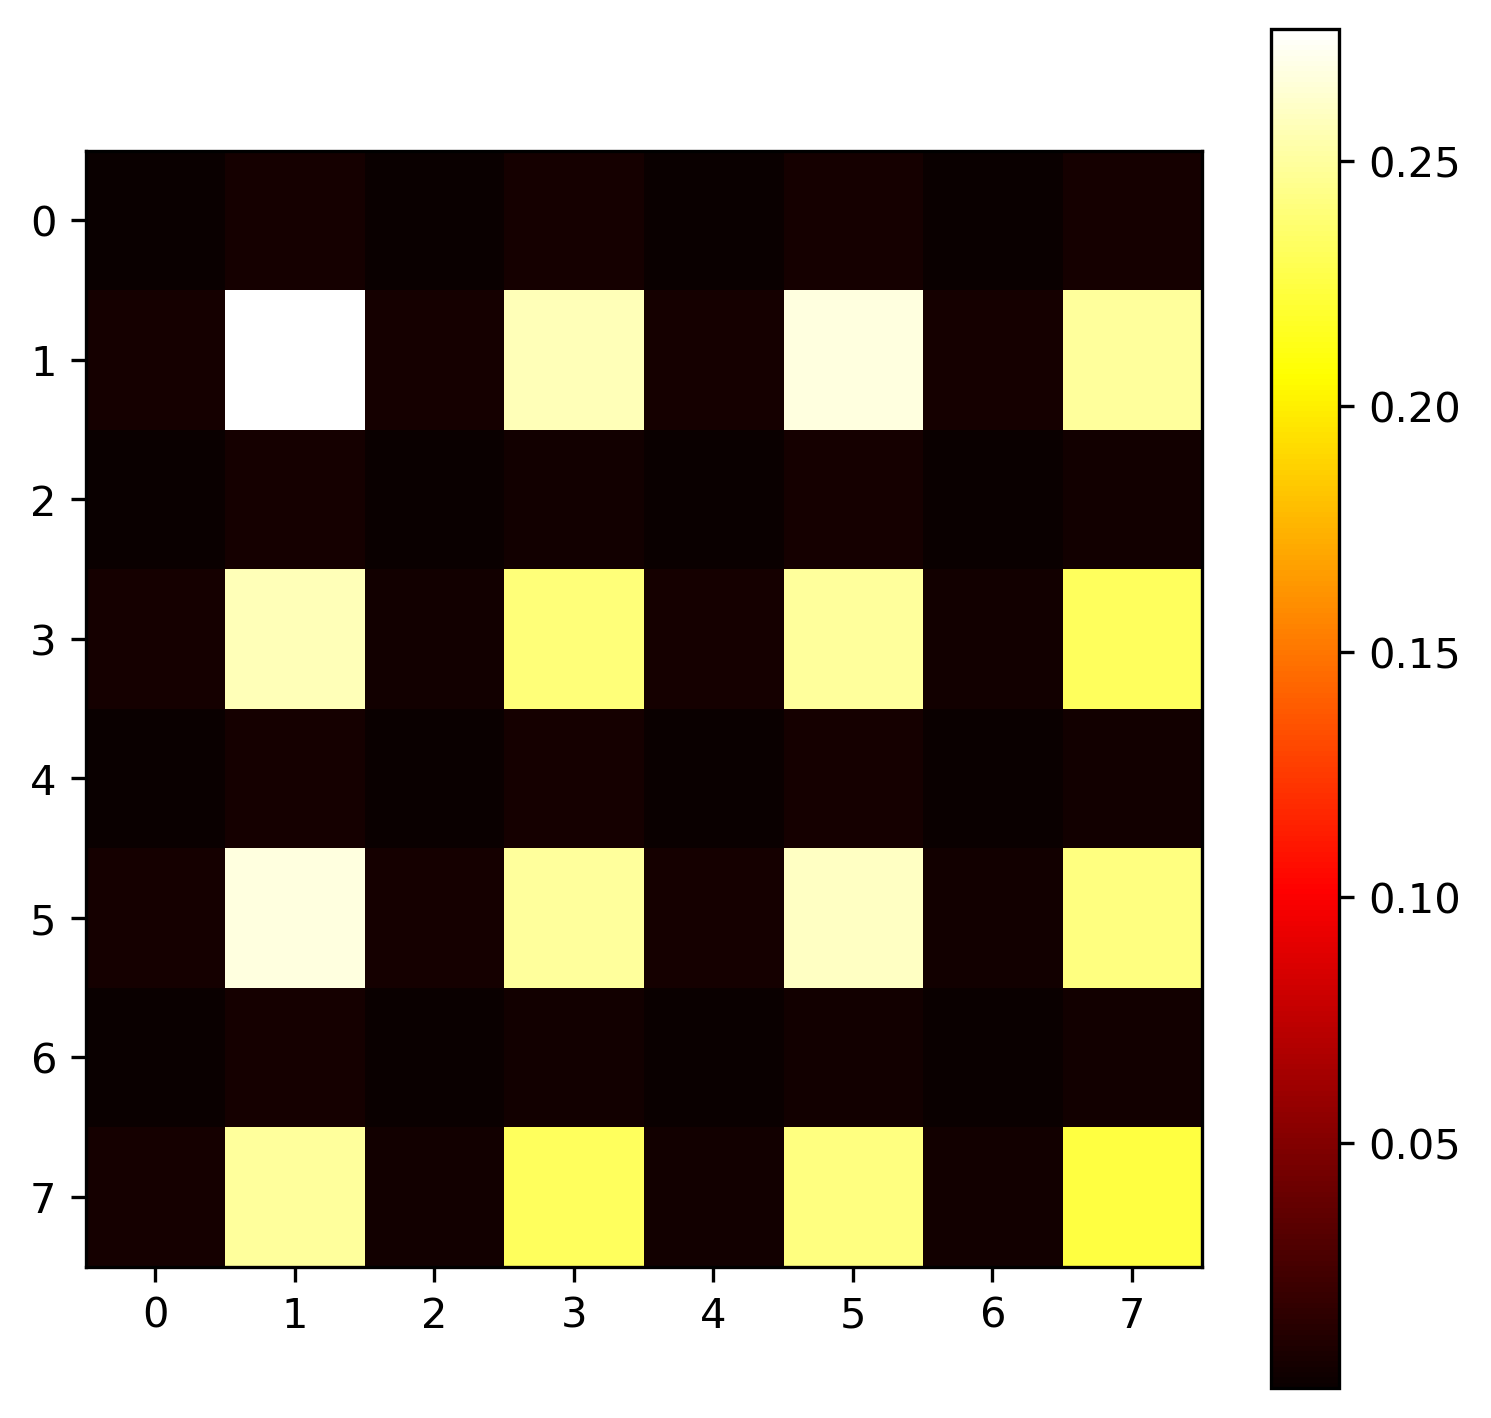

In [147]:
fig = plt.figure(figsize=(6,6), dpi = 300, facecolor='w', edgecolor='k')
plt.imshow(np.abs(state), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [148]:
steady_state = choi_steady_state(model.channel.choi)

NameError: name 'reshuffle_choi' is not defined